In [1]:
#Render plots in notebook environment
%matplotlib inline

#Import the dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import seaborn as sns

#Load in CSV file
mock_data_df = pd.read_csv("mock_data.csv")
mock_data_df


,UMI,Sender Level2,Sender Level2 Name,Sender Level1,Sender Level1 Name,Sender,Sender Name,Sender Ext Code,Sender GLID City,Sender Audit Date,...,Sender Account Executive,Mvmt Receiver Name,Mvmt Receiver Address,Mvmt Receiver City,Mvmt Receiver Region,Mvmt Receiver Zipcode,DOD,Unk_DON,Qty,Age Bucket
0,2035476170921,4000095649,Chiquota,4000397583,Smith PLC,4000058639,Jones Ltd,57913796002,Jonathanbury,2023-11-15,...,-,"Brennan, Parker and Lyons",429 Stephenson Vista Apt. 296,Glassbury,Maryland,60560,2023-03-20,2023-07-05,13,10-20
1,2036610132543,4000119294,Costgo,4000600685,"Smith, Herrera and Tucker",4000639894,"Miller, Graham and Mitchell",11151134228,Diazmouth,2023-09-06,...,-,Hicks Inc,244 Robert Glens,East Vanessashire,Pennsylvania,67674,2023-08-09,2023-07-26,10,10-20
2,2039136835529,4000892679,Costgo,4000941500,Mclaughlin-Anderson,4000439066,Sparks-Morgan,43384992902,West Markville,2023-08-05,...,-,West-Mcintyre,060 Heather Fields,North Gloria,North Carolina,47700,2023-01-23,2023-07-15,32,40-50
3,2031278452129,4000133976,Kroft,4000521794,Werner LLC,4000311075,Wagner and Sons,35754048059,Marktown,2023-08-18,...,-,Martinez and Sons,21643 Mason Turnpike Apt. 929,Port Kristi,Maine,70080,2023-06-12,2023-09-03,23,70-80
4,2035562224180,4000295658,Kroft,4000253262,Patterson LLC,4000932934,Hernandez-Hodges,60922837179,Browningstad,2023-08-27,...,-,"Crosby, Scott and Holder",441 Johnson Harbor,Marshallport,Tennessee,32120,2023-10-13,2023-03-23,37,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2038998482068,4000238028,Nosson Foods,4000174792,Marshall LLC,4000606800,West-Smith,64500064638,Hallhaven,2023-05-14,...,-,"White, Parker and Anderson",2506 Colon Ville,Jasonstad,Oregon,34485,2023-02-12,2023-09-10,2,20-30
49996,2033944324324,4000247582,General Malls,4000091817,"Collier, Gomez and Watts",4000721307,Curry-Matthews,27967066582,Dominguezberg,2023-09-01,...,-,Walker and Sons,0029 Holly Cape,Johnmouth,Hawaii,23212,2023-03-06,2023-02-01,4,40-50
49997,2032487233469,4000940679,Kroft,4000044319,"Brown, Porter and Smith",4000106843,Riddle-Leach,39959727924,Port Shanefort,2023-04-11,...,-,Williams-Griffith,7479 Wood Village Suite 666,Kevinborough,Pennsylvania,59260,2023-04-01,2023-03-16,3,60-70
49998,2036735292784,4000970397,Nosson Foods,4000737728,Holland-Lopez,4000350083,Schneider Group,75716948106,West Davidshire,2023-09-29,...,-,"Gomez, Salinas and Grant",USNS Robinson,West Joseland,North Dakota,91864,2023-02-10,2023-11-10,32,90-100


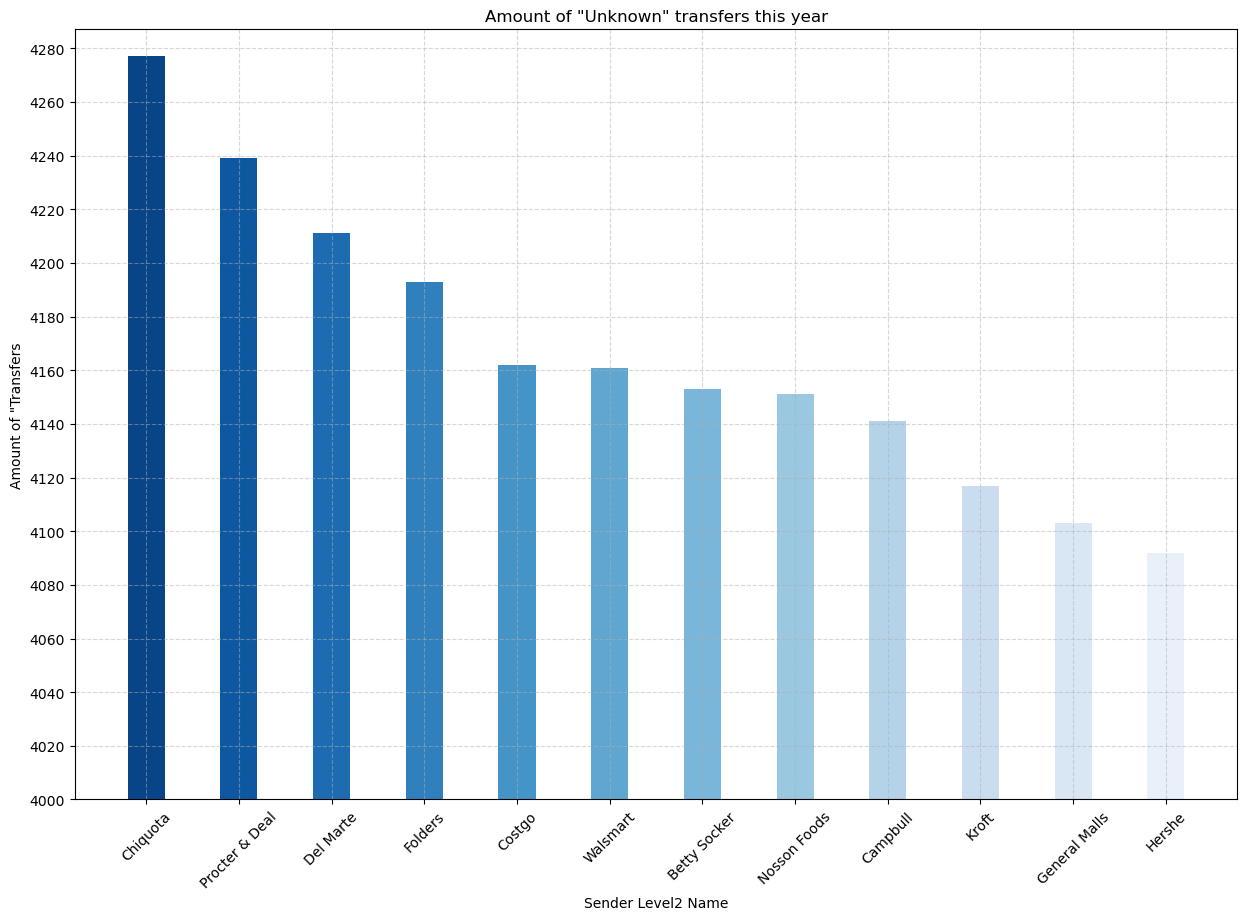

In [16]:
column_name = 'Sender Level2 Name'
value_counts = mock_data_df[column_name].value_counts()

# Create a gradient color palette
num_bars = len(value_counts)
color_palette = sns.color_palette("Blues_r", n_colors=num_bars)

# Bar graph bar width
bar_width = .4

# Creating bar chart showing the amount of times an unassigned account appears on the "Unknowns" list 
plt.figure(figsize=(15,10)) # Sizing my graph


# Setting up the lower and upper limits of the y-axis
y_start = 4000
y_end = value_counts.max() + 10 
plt.ylim(y_start, y_end)

# Creating y-axis ticks
y_ticks = np.arange(y_start, y_end + 1, 20)  # Adjust the interval as needed
plt.yticks(y_ticks)

plt.bar(value_counts.index, value_counts.values, width=bar_width, color=color_palette)
plt.xlabel(column_name)
plt.ylabel('Amount of "Transfers')
plt.title(f'Amount of "Unknown" transfers this year') 
plt.xticks(rotation=45)  

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the bar chart
plt.show()

In [8]:
# Finding the total amount of pallets transfered

# Group by company and sum the quantities
grouped = mock_data_df.groupby('Sender Level2 Name')['Qty'].sum().reset_index()

# Creating a new DataFrame with company names and total quantities
total_quantities_df = pd.DataFrame({
    'Company': grouped['Sender Level2 Name'],
    'Total Quantity': grouped['Qty']
})

# Sorting 'Total Quantity' column in descending order
total_quantities_df = total_quantities_df.sort_values(by='Total Quantity', ascending=False)

# Saving the new DF as a CSV
total_quantities_df.to_csv('total_quantities.csv', index=False)

# Display the DataFrame
print(total_quantities_df)

           Company  Total Quantity
2         Chiquota           88348
10  Procter & Deal           86330
11        Walsmart           85776
4        Del Marte           85465
5          Folders           85403
9     Nosson Foods           85249
8            Kroft           85114
3           Costgo           85099
1         Campbull           84909
0     Betty Socker           84759
6    General Malls           83354
7           Hershe           83242


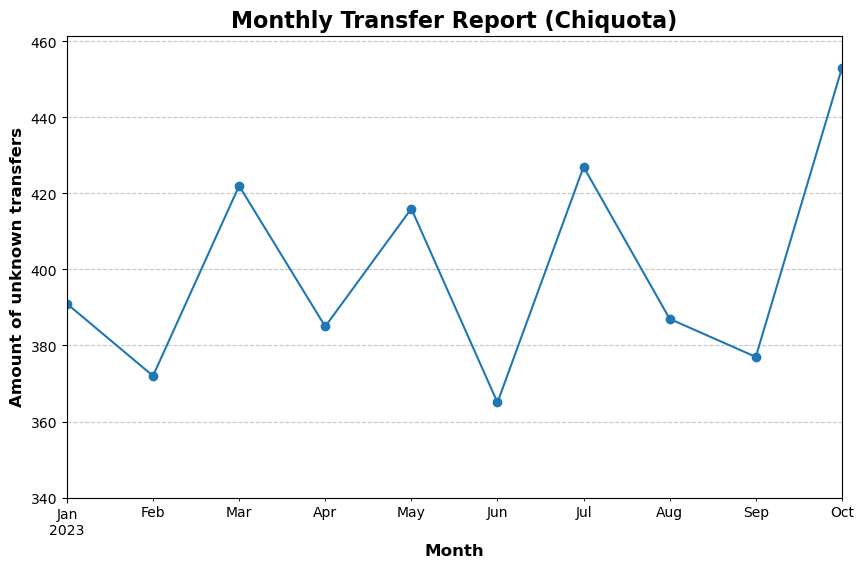

In [17]:
folders_df = mock_data_df[mock_data_df['Sender Level2 Name'] == 'Chiquota']

# Filter rows where "Sender Level2 Name" is "Folders"
folders_df = mock_data_df[mock_data_df['Sender Level2 Name'] == 'Chiquota'].copy()  

# Convert the "DOD" column to a datetime data type using .loc[]
folders_df.loc[:, 'DOD'] = pd.to_datetime(folders_df['DOD'])

# Group the data by month and count occurrences
monthly_counts = folders_df.groupby(folders_df['DOD'].dt.to_period('M')).size()

# Create a line chart to visualize the counts over time
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o', linestyle='-')

#Y axis starting point
plt.ylim(bottom=340)

# October as end date
plt.xlim(right=pd.to_datetime('2023-10-30')) 

# Customize labels and title
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Amount of unknown transfers', fontsize=12, fontweight='bold')
plt.title('Monthly Transfer Report (Chiquota)', fontsize=16, fontweight='bold')

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the line chart
plt.show()

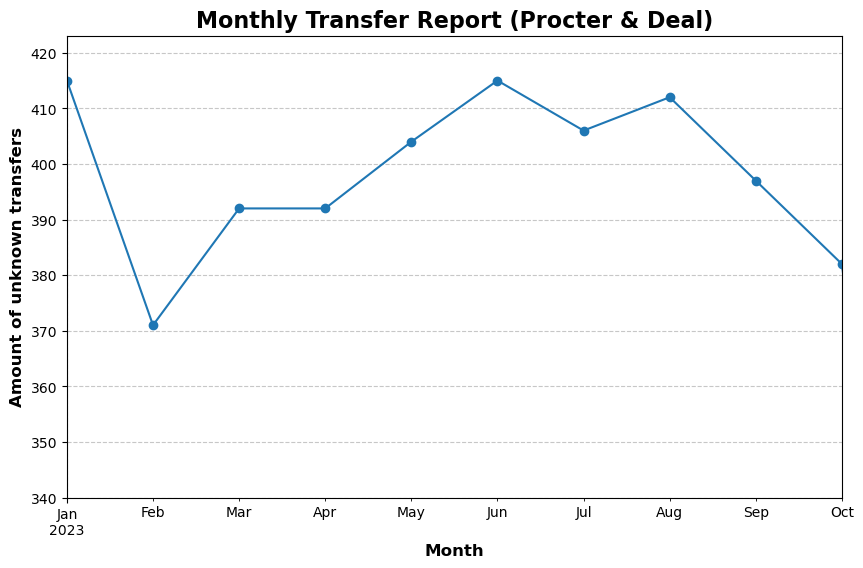

In [18]:
folders_df = mock_data_df[mock_data_df['Sender Level2 Name'] == 'Procter & Deal']

# Filter rows where "Sender Level2 Name" is "Folders"
folders_df = mock_data_df[mock_data_df['Sender Level2 Name'] == 'Procter & Deal'].copy()  

# Convert the "DOD" column to a datetime data type using .loc[]
folders_df.loc[:, 'DOD'] = pd.to_datetime(folders_df['DOD'])

# Group the data by month and count occurrences
monthly_counts = folders_df.groupby(folders_df['DOD'].dt.to_period('M')).size()

# Create a line chart to visualize the counts over time
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o', linestyle='-')

#Y axis starting point
plt.ylim(bottom=340)

# October as end date
plt.xlim(right=pd.to_datetime('2023-10-30')) 

# Customize labels and title
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Amount of unknown transfers', fontsize=12, fontweight='bold')
plt.title('Monthly Transfer Report (Procter & Deal)', fontsize=16, fontweight='bold')

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the line chart
plt.show()

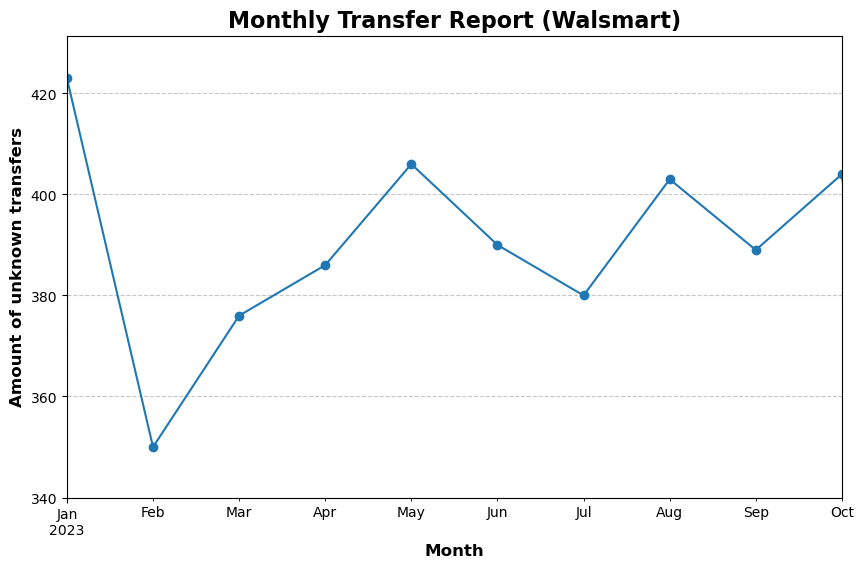

In [19]:
folders_df = mock_data_df[mock_data_df['Sender Level2 Name'] == 'Walsmart']

# Filter rows where "Sender Level2 Name" is "Folders"
folders_df = mock_data_df[mock_data_df['Sender Level2 Name'] == 'Walsmart'].copy()  

# Convert the "DOD" column to a datetime data type using .loc[]
folders_df.loc[:, 'DOD'] = pd.to_datetime(folders_df['DOD'])

# Group the data by month and count occurrences
monthly_counts = folders_df.groupby(folders_df['DOD'].dt.to_period('M')).size()

# Create a line chart to visualize the counts over time
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o', linestyle='-')

#Y axis starting point
plt.ylim(bottom=340)

# October as end date
plt.xlim(right=pd.to_datetime('2023-10-30')) 

# Customize labels and title
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Amount of unknown transfers', fontsize=12, fontweight='bold')
plt.title('Monthly Transfer Report (Walsmart)', fontsize=16, fontweight='bold')

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the line chart
plt.show()

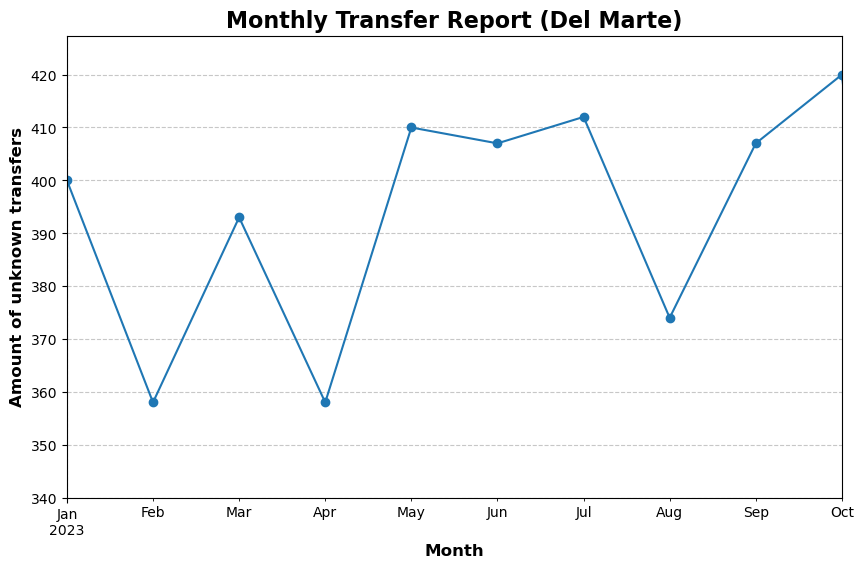

In [20]:
folders_df = mock_data_df[mock_data_df['Sender Level2 Name'] == 'Del Marte']

# Filter rows where "Sender Level2 Name" is "Folders"
folders_df = mock_data_df[mock_data_df['Sender Level2 Name'] == 'Del Marte'].copy()  

# Convert the "DOD" column to a datetime data type using .loc[]
folders_df.loc[:, 'DOD'] = pd.to_datetime(folders_df['DOD'])

# Group the data by month and count occurrences
monthly_counts = folders_df.groupby(folders_df['DOD'].dt.to_period('M')).size()

# Create a line chart to visualize the counts over time
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o', linestyle='-')

#Y axis starting point
plt.ylim(bottom=340)

# October as end date
plt.xlim(right=pd.to_datetime('2023-10-30')) 

# Customize labels and title
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Amount of unknown transfers', fontsize=12, fontweight='bold')
plt.title('Monthly Transfer Report (Del Marte)', fontsize=16, fontweight='bold')

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the line chart
plt.show()